In [49]:
## Notebook to verify that QFT-1QFT|x> = |x>

import numpy as np
from qiskit import *
from qiskit_aer import *
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [57]:
def QFTINVQFT(numQB, init = [], shots = 2000):
    qc = QuantumCircuit(numQB,numQB)
    for bit in init:
        qc.x(bit)
    qft = QFT(num_qubits=numQB, approximation_degree=0).to_gate()
    invqft = QFT(num_qubits=numQB, approximation_degree=0, inverse=True).to_gate()
    qc.append(qft, qargs=range(0,numQB))
    qc.append(invqft, qargs=range(0,numQB))
    qc.measure_all()
    simulator = Aer.get_backend("qasm_simulator")
    transpiler = transpile(qc, backend=simulator)
    result = simulator.run(transpiler, shots=shots).result()
    counts = result.get_counts()
    for key in counts.keys():
        counts[key] = counts[key]/shots
    return counts, qc

{'00001100 00000000': 1.0}


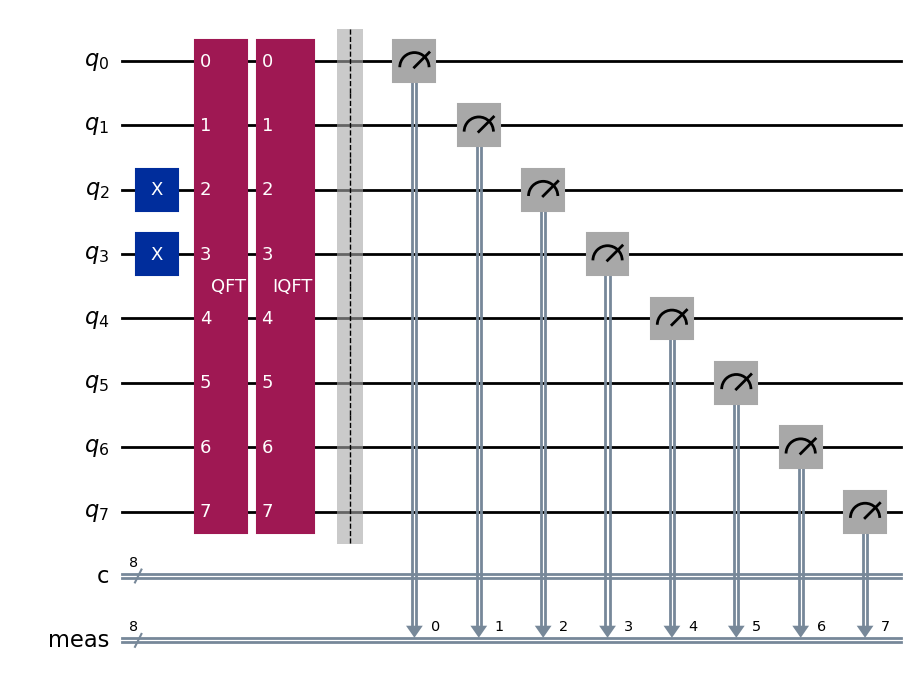

In [55]:
counts1, qc1 = QFTINVQFT(8, [2,3], 10000)
print(counts1)
qc1.draw("mpl")

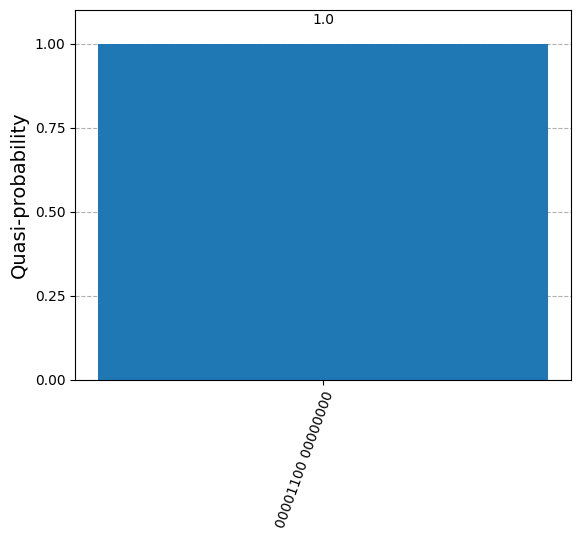

In [56]:
plot_histogram(counts1)

{'00001100 00000000': 1.0}


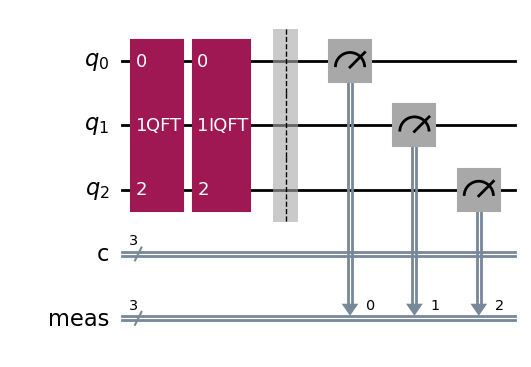

In [59]:
counts2, qc2 = QFTINVQFT(3, shots = 10000)
print(counts1)
qc2.draw("mpl")

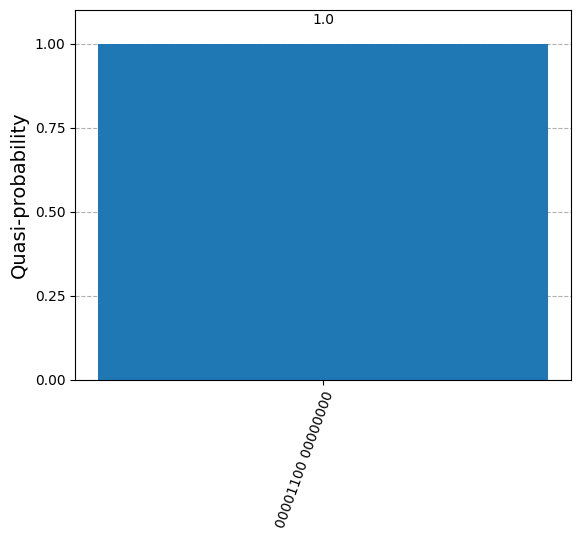

In [60]:
plot_histogram(counts1)